In [1]:
# 時系列データとは
# 時間の経過とともに観察されたデータのこと Ex, 毎月の消費者物価指数、毎日の最高気温

# 平均、分散、自己共分散について
# 観測時点を固定することで確率変数となり平均や分散を求めることができる
# また、同一データの異なる時点の共分散を「自己共分散」、相関係数は「自己相関係数」という
# この時の時間差はラグと呼ばれる

In [2]:
# 定常性について
# 時間経過による影響を（強く）受けない状態のこと

# 時系列データの平均・分散が有限で、平均が観測時点に依存せず、
# また自己共分散、自己相関係数も観測時点には依存せず、
# ラグのみに依存する場合、その系列は「共分散定常過程」もしくは「弱定常過程」という
# 要するに、過程の期待値と自己共分散が一定であるもの

# 観測時点には依存せず、ラグのみに依存する場合、「強定常過程」とよばれる
# 要するに、同時分布が不変であるもの

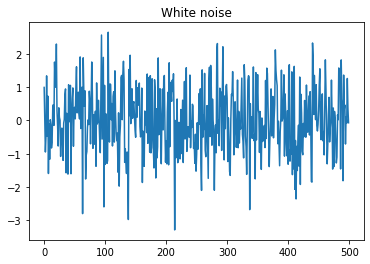

In [4]:
# ホワイトノイズについて
# 共分散定常過程の平均が0、ラグが0ではない、かつすべての自己共分散が0ではないときの系列
from random import gauss
import matplotlib.pyplot as plt

whitenoise = [gauss(mu = 0.0, sigma = 1.0) for i in range(500)]
plt.title("White noise")
plt.plot(whitenoise)
plt.show()

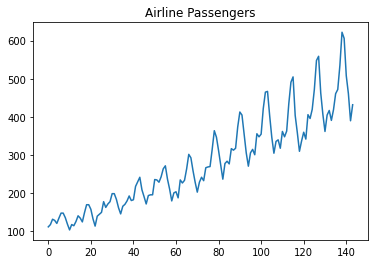

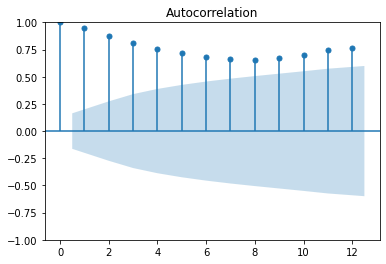

In [57]:
# 自己回帰(AR：Autoregressive Integrated)過程について
# 現在のデータを過去のデータに回帰させて未来の値を算出するモデル

import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# airlineデータセットを使用
from sktime.datasets import load_airline
airline_data = load_airline()
airline_df = pd.DataFrame(
        airline_data,
    )
airline_df.columns = ["Passengers"]
airline_df = airline_df.reset_index("Period")

plt.plot(airline_df["Passengers"])
plt.title("Airline Passengers")
plt.show()

# 自己相関を求める
df_acf = sm.tsa.stattools.acf(airline_df["Passengers"], nlags=12) # 各年同月について確認
fig = sm.graphics.tsa.plot_acf(airline_df["Passengers"], lags=12) # コレログラムを描画

#　薄青の空間は、真に自己相関がない場合の信頼区間95%の範囲
# つまり、この範囲外の値を持つlag地点に（統計的に）有意な自己相関があるといえる
# このデータについては、lag=12で全区間で有意な自己相関あり

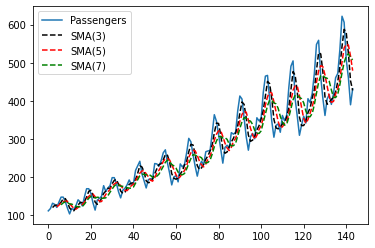

In [24]:
# 移動平均(MA：Moving Average)過程について
# 任意の時点のデータと過去のデータで平均を取リ算出するモデル

# 移動平均を計算
airline_df["3ma"]=airline_df["Passengers"].rolling(3).mean().round(1)
airline_df["5ma"]=airline_df["Passengers"].rolling(5).mean().round(1)
airline_df["7ma"]=airline_df["Passengers"].rolling(7).mean().round(1)

# 可視化
plt.plot(airline_df["Passengers"], label="Passengers")
plt.plot(airline_df["3ma"], "k--", label="SMA(3)")
plt.plot(airline_df["5ma"], "r--", label="SMA(5)")
plt.plot(airline_df["7ma"], "g--", label="SMA(7)")
plt.legend()
plt.show()

144


c:\Users\kazu1\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\kazu1\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


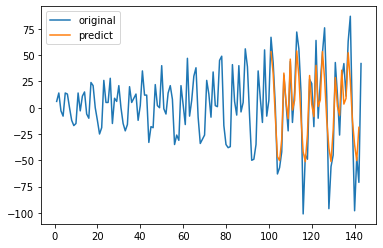

In [47]:
# 自己回帰移動平均(ARMA)過程について
# 現在のデータを過去のデータとホワイトノイズの和によって表現するモデル
# AR過程とMA過程から構成されるモデルと考えることもできる

from statsmodels.tsa.arima.model import ARIMA

target = airline_df["Passengers"].diff().values
print(len(target)) # 144データ

arma_model = ARIMA(target[0:100], order=(12,0,3)) # lag:12, ma:3
pred = arma_model.fit().predict(start=101, end=143)
pred_df = pd.DataFrame(pred)
pred_df["index"] = pd.Series(range(101, 143))
pred_df = pred_df.set_index("index")

# 実データと予測データを可視化
plt.plot(target, label="original")
plt.plot(pred_df, label="predict")
plt.legend()
plt.show()

c:\Users\kazu1\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\kazu1\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\kazu1\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


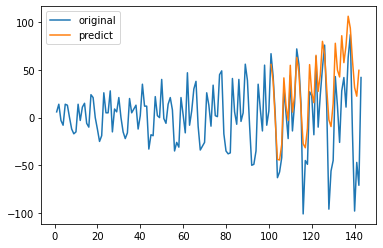

In [55]:
# 自己回帰和分移動平均(ARIMA)過程について
# ARMAに時系列データの階差分を加えたもの

arima_model = ARIMA(target[0:100], order=(12,3,3)) # lag:12, d:3, ma:3
pred = arima_model.fit().predict(start=101, end=143)
pred_df = pd.DataFrame(pred)
pred_df["index"] = pd.Series(range(101, 143))
pred_df = pred_df.set_index("index")

# 実データと予測データを可視化
plt.plot(target, label="original")
plt.plot(pred_df, label="predict")
plt.legend()
plt.show()

In [56]:
# ディッキーフラー検定とは
# 時系列データが単位根を持つかどうかで判断するための方法
# 参考URL:https://qiita.com/innovation1005/items/6a1a67086be429566f27

c:\Users\kazu1\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


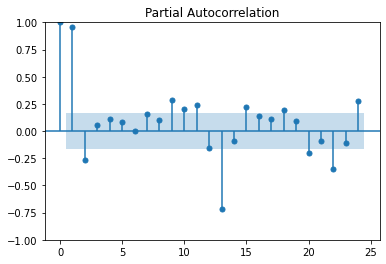

In [60]:
# 偏自己相関係数とは
# 任意の時点の自己相関について、その期中に含まれるほかの時点の自己相関の影響を取り除いたもの
# AR過程の次数選択で活用される

fig = sm.graphics.tsa.plot_pacf(airline_df["Passengers"], lags=12) # コレログラムを描画

In [61]:
# スペクトラム(スペクトル密度関数)とは
# 時系列データをsin, cosなどの周波数関数で分析する手法をスペクトル解析という
# その時に対象とする時系列データをスペクトラム(スペクトル密度関数)と呼ぶ

In [62]:
# ペリオドグラム(　ピリオドグラム)
# 実際の観測値を用いて定義されたスペクトラムのこと

In [63]:
# 状態空間モデルについて
# ARIMA過程よりも複雑な時系列モデル。データの予測だけでなく解釈も可能になる
# 「観測方程式」と「状態方程式(遷移方程式)」からなる
# 上記の式のパラメータ推定には、カルマンフィルタなどが用いられる

In [ ]:
# ダービン・ワトソン検定について
# 時系列データ回帰モデルの誤差項に自己相関があるかどうかの仮説検定で使用される
# ダービン・ワトソン比を統計量として用いる